In [1]:
#loading
import pandas as pd
import numpy as np
import missingno as msno

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#filter warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
city_df = pd.read_csv('city_day.csv')

In [3]:
city_df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01-07-2020,37.63,NaN,4.42,35.04,20.17,NaN,0.28,14.40,9.69,1.73,47.05,1.87,119.0,Moderate
1,Aizawl,01-07-2020,4.49,5.39,11.44,0.07,15.11,19.41,0.02,2.07,3.39,NaN,NaN,NaN,20.0,Good
2,Amaravati,01-07-2020,22.00,34.00,1.50,9.68,6.40,8.45,0.59,10.88,29.15,0.10,0.50,NaN,54.0,Satisfactory
3,Amritsar,01-07-2020,57.67,100.99,32.81,15.11,30.20,17.73,0.59,3.48,16.48,1.30,1.10,8.82,78.0,Satisfactory
4,Bengaluru,01-07-2020,17.50,30.48,3.95,13.25,14.83,7.42,0.54,6.66,15.40,0.27,0.65,NaN,43.0,Good


In [4]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [5]:
city_df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [6]:
city_df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [7]:
city_df['Date'] = pd.to_datetime(city_df['Date'])
city_df.rename(columns = {'AQI_Bucket':'Air_quality'}, inplace = True)
city_df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air_quality
0,Ahmedabad,2020-01-07,37.63,NaN,4.42,35.04,20.17,NaN,0.28,14.40,9.69,1.73,47.05,1.87,119.0,Moderate
1,Aizawl,2020-01-07,4.49,5.39,11.44,0.07,15.11,19.41,0.02,2.07,3.39,NaN,NaN,NaN,20.0,Good
2,Amaravati,2020-01-07,22.00,34.00,1.50,9.68,6.40,8.45,0.59,10.88,29.15,0.10,0.50,NaN,54.0,Satisfactory
3,Amritsar,2020-01-07,57.67,100.99,32.81,15.11,30.20,17.73,0.59,3.48,16.48,1.30,1.10,8.82,78.0,Satisfactory
4,Bengaluru,2020-01-07,17.50,30.48,3.95,13.25,14.83,7.42,0.54,6.66,15.40,0.27,0.65,NaN,43.0,Good


In [37]:
city_df.dtypes

City                   object
Date           datetime64[ns]
PM2.5                 float64
PM10                  float64
NO                    float64
NO2                   float64
NOx                   float64
NH3                   float64
CO                    float64
SO2                   float64
O3                    float64
Benzene               float64
Toluene               float64
Xylene                float64
AQI                   float64
Air_quality            object
dtype: object

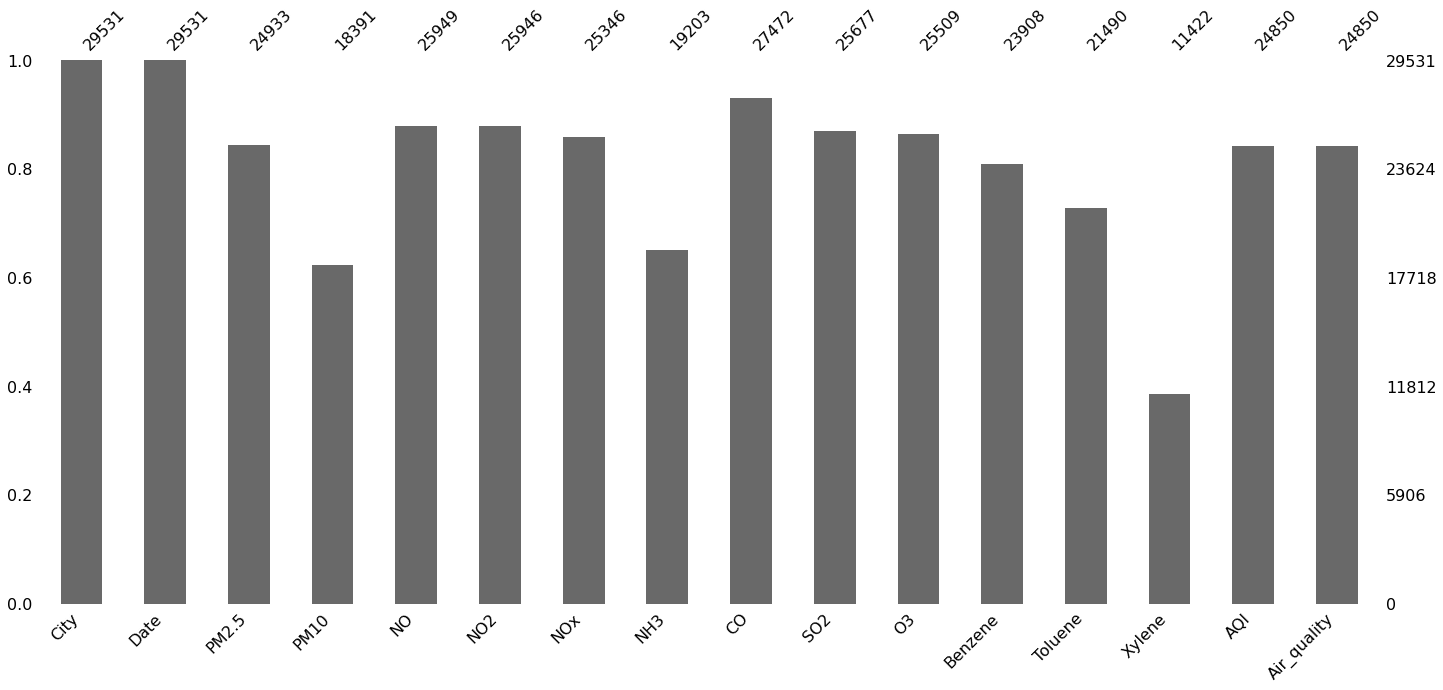

In [8]:
msno.bar(city_df);

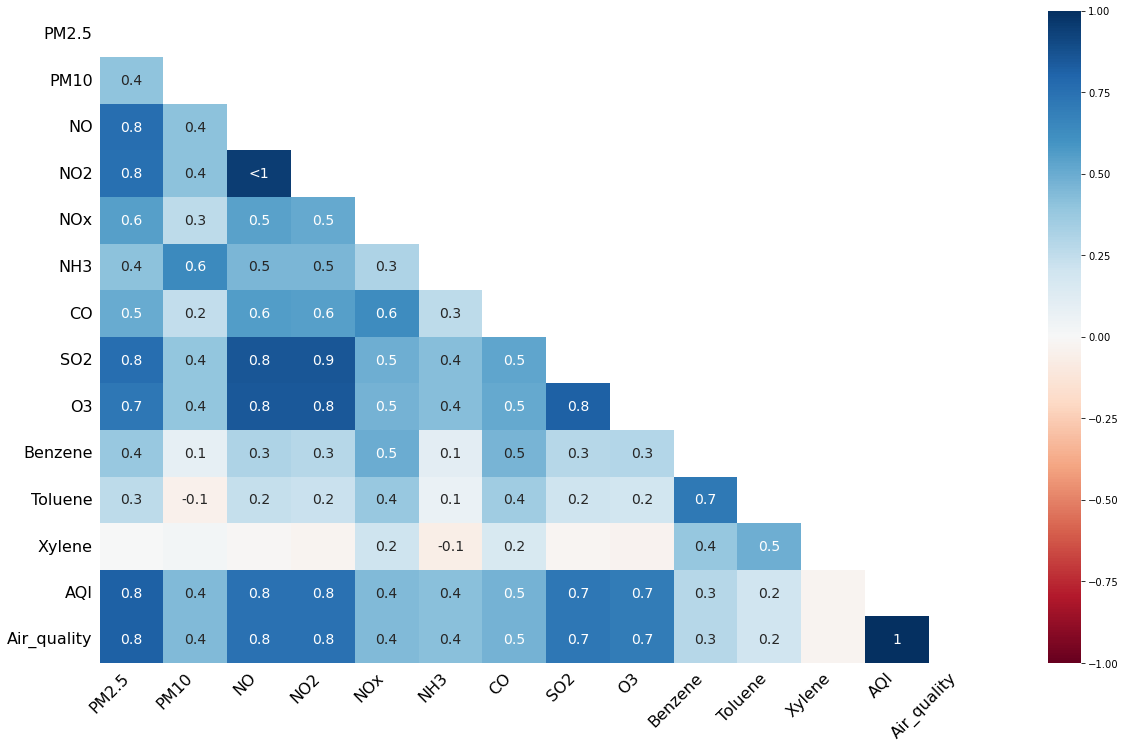

In [9]:
msno.heatmap(city_df);

In [10]:
without_city_date_df = city_df.copy()
without_city_date_df.drop(['City','Date','Air_quality'], inplace=True, axis=1)

In [11]:
df3 = without_city_date_df[(without_city_date_df.isna().all(axis=1)) | (without_city_date_df['AQI'].isna())]

In [12]:
lst = df3.index

In [13]:
lst

Int64Index([    6,     9,    32,    58,    84,   110,   136,   162,   188,
              214,
            ...
            29519, 29520, 29521, 29523, 29524, 29525, 29526, 29527, 29529,
            29530],
           dtype='int64', length=4681)

In [14]:
without_city_date_df.drop(index=lst, inplace=True)

In [15]:
without_city_date_df.head(10)

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,37.63,NaN,4.42,35.04,20.17,NaN,0.28,14.40,9.69,1.73,47.05,1.87,119.0
1,4.49,5.39,11.44,0.07,15.11,19.41,0.02,2.07,3.39,NaN,NaN,NaN,20.0
2,22.00,34.00,1.50,9.68,6.40,8.45,0.59,10.88,29.15,0.10,0.50,NaN,54.0
3,57.67,100.99,32.81,15.11,30.20,17.73,0.59,3.48,16.48,1.30,1.10,8.82,78.0
4,17.50,30.48,3.95,13.25,14.83,7.42,0.54,6.66,15.40,0.27,0.65,NaN,43.0
5,14.00,30.00,1.10,5.12,3.62,8.05,0.35,12.45,48.77,NaN,NaN,NaN,69.0
7,32.90,72.38,0.56,9.87,5.92,36.63,0.33,14.91,34.33,3.31,0.33,0.46,66.0
8,15.95,4.85,6.22,10.72,16.44,33.52,1.02,9.23,48.37,0.09,0.00,NaN,92.0
10,54.01,128.66,6.33,21.05,16.81,29.06,0.97,11.15,29.73,2.03,23.57,0.65,101.0
11,5.88,13.91,2.58,2.40,1.60,1.44,2.10,2.72,NaN,0.00,0.00,0.00,111.0


In [16]:
without_city_date_df.reset_index(inplace=True)
without_city_date_df.drop('index', axis=1, inplace=True)
without_city_date_df.head(10)

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,37.63,NaN,4.42,35.04,20.17,NaN,0.28,14.40,9.69,1.73,47.05,1.87,119.0
1,4.49,5.39,11.44,0.07,15.11,19.41,0.02,2.07,3.39,NaN,NaN,NaN,20.0
2,22.00,34.00,1.50,9.68,6.40,8.45,0.59,10.88,29.15,0.10,0.50,NaN,54.0
3,57.67,100.99,32.81,15.11,30.20,17.73,0.59,3.48,16.48,1.30,1.10,8.82,78.0
4,17.50,30.48,3.95,13.25,14.83,7.42,0.54,6.66,15.40,0.27,0.65,NaN,43.0
5,14.00,30.00,1.10,5.12,3.62,8.05,0.35,12.45,48.77,NaN,NaN,NaN,69.0
6,32.90,72.38,0.56,9.87,5.92,36.63,0.33,14.91,34.33,3.31,0.33,0.46,66.0
7,15.95,4.85,6.22,10.72,16.44,33.52,1.02,9.23,48.37,0.09,0.00,NaN,92.0
8,54.01,128.66,6.33,21.05,16.81,29.06,0.97,11.15,29.73,2.03,23.57,0.65,101.0
9,5.88,13.91,2.58,2.40,1.60,1.44,2.10,2.72,NaN,0.00,0.00,0.00,111.0


In [17]:
without_city_date_df

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,37.63,NaN,4.42,35.04,20.17,NaN,0.28,14.40,9.69,1.73,47.05,1.87,119.0
1,4.49,5.39,11.44,0.07,15.11,19.41,0.02,2.07,3.39,NaN,NaN,NaN,20.0
2,22.00,34.00,1.50,9.68,6.40,8.45,0.59,10.88,29.15,0.10,0.50,NaN,54.0
3,57.67,100.99,32.81,15.11,30.20,17.73,0.59,3.48,16.48,1.30,1.10,8.82,78.0
4,17.50,30.48,3.95,13.25,14.83,7.42,0.54,6.66,15.40,0.27,0.65,NaN,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24845,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0
24846,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0
24847,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0
24848,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0


In [18]:
city_df_copy = city_df.copy()
city_df_copy.drop(index=lst, inplace=True)
city_df_copy.reset_index(inplace=True)
city_df_copy.drop('index', axis=1, inplace=True)
city_df_copy.head(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air_quality
0,Ahmedabad,2020-01-07,37.63,NaN,4.42,35.04,20.17,NaN,0.28,14.40,9.69,1.73,47.05,1.87,119.0,Moderate
1,Aizawl,2020-01-07,4.49,5.39,11.44,0.07,15.11,19.41,0.02,2.07,3.39,NaN,NaN,NaN,20.0,Good
2,Amaravati,2020-01-07,22.00,34.00,1.50,9.68,6.40,8.45,0.59,10.88,29.15,0.10,0.50,NaN,54.0,Satisfactory
3,Amritsar,2020-01-07,57.67,100.99,32.81,15.11,30.20,17.73,0.59,3.48,16.48,1.30,1.10,8.82,78.0,Satisfactory
4,Bengaluru,2020-01-07,17.50,30.48,3.95,13.25,14.83,7.42,0.54,6.66,15.40,0.27,0.65,NaN,43.0,Good
5,Bhopal,2020-01-07,14.00,30.00,1.10,5.12,3.62,8.05,0.35,12.45,48.77,NaN,NaN,NaN,69.0,Satisfactory
6,Chandigarh,2020-01-07,32.90,72.38,0.56,9.87,5.92,36.63,0.33,14.91,34.33,3.31,0.33,0.46,66.0,Satisfactory
7,Chennai,2020-01-07,15.95,4.85,6.22,10.72,16.44,33.52,1.02,9.23,48.37,0.09,0.00,NaN,92.0,Satisfactory
8,Delhi,2020-01-07,54.01,128.66,6.33,21.05,16.81,29.06,0.97,11.15,29.73,2.03,23.57,0.65,101.0,Moderate
9,Ernakulam,2020-01-07,5.88,13.91,2.58,2.40,1.60,1.44,2.10,2.72,NaN,0.00,0.00,0.00,111.0,Moderate


In [19]:
city_df_copy

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air_quality
0,Ahmedabad,2020-01-07,37.63,NaN,4.42,35.04,20.17,NaN,0.28,14.40,9.69,1.73,47.05,1.87,119.0,Moderate
1,Aizawl,2020-01-07,4.49,5.39,11.44,0.07,15.11,19.41,0.02,2.07,3.39,NaN,NaN,NaN,20.0,Good
2,Amaravati,2020-01-07,22.00,34.00,1.50,9.68,6.40,8.45,0.59,10.88,29.15,0.10,0.50,NaN,54.0,Satisfactory
3,Amritsar,2020-01-07,57.67,100.99,32.81,15.11,30.20,17.73,0.59,3.48,16.48,1.30,1.10,8.82,78.0,Satisfactory
4,Bengaluru,2020-01-07,17.50,30.48,3.95,13.25,14.83,7.42,0.54,6.66,15.40,0.27,0.65,NaN,43.0,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24845,Delhi,2015-05-01,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor
24846,Delhi,2015-04-01,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
24847,Delhi,2015-03-01,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
24848,Delhi,2015-02-01,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe


In [20]:
city_df_copy.isnull().sum().sort_values(ascending=False)

Xylene         15372
PM10            7086
NH3             6536
Toluene         5826
Benzene         3535
NOx             1857
O3               807
PM2.5            678
SO2              605
CO               445
NO2              391
NO               387
City               0
Date               0
AQI                0
Air_quality        0
dtype: int64

In [21]:
df1 = city_df_copy.copy()
df1['PM2.5']=df1['PM2.5'].fillna((df1['PM2.5'].median()))
df1['PM10']=df1['PM10'].fillna((df1['PM10'].median()))
df1['NO']=df1['NO'].fillna((df1['NO'].median()))
df1['NO2']=df1['NO2'].fillna((df1['NO2'].median()))
df1['NOx']=df1['NOx'].fillna((df1['NOx'].median()))
df1['NH3']=df1['NH3'].fillna((df1['NH3'].median()))
df1['CO']=df1['CO'].fillna((df1['CO'].median()))
df1['SO2']=df1['SO2'].fillna((df1['SO2'].median()))
df1['O3']=df1['O3'].fillna((df1['O3'].median()))
df1['Benzene']=df1['Benzene'].fillna((df1['Benzene'].median()))
df1['Toluene']=df1['Toluene'].fillna((df1['Toluene'].median()))
df1['Xylene']=df1['Xylene'].fillna((df1['Xylene'].median()))

In [22]:
df1.isnull().sum().sort_values(ascending=False)

City           0
Date           0
PM2.5          0
PM10           0
NO             0
NO2            0
NOx            0
NH3            0
CO             0
SO2            0
O3             0
Benzene        0
Toluene        0
Xylene         0
AQI            0
Air_quality    0
dtype: int64

In [23]:
df1.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000
mean,66.966637,112.102860,17.502312,28.870163,31.645675,21.865639,2.319923,14.237723,34.793934,3.150167,8.130589,2.247154,166.463581
std,62.283431,76.325808,22.266346,24.447523,29.629575,22.460343,7.014082,17.233456,21.378711,14.870955,18.443104,4.302180,140.696585
min,0.040000,0.030000,0.030000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,29.560000,71.780000,5.720000,12.090000,14.030000,11.280000,0.590000,5.790000,19.640000,0.340000,1.580000,1.420000,81.000000
50%,48.785000,96.180000,9.910000,22.100000,23.680000,16.310000,0.930000,9.220000,31.250000,1.290000,3.575000,1.420000,118.000000
75%,79.507500,122.957500,19.710000,37.910000,38.170000,24.710000,1.460000,14.890000,45.397500,2.850000,7.380000,1.420000,208.000000
max,914.940000,917.080000,390.680000,362.210000,378.240000,352.890000,175.810000,186.080000,257.730000,455.030000,454.850000,170.370000,2049.000000


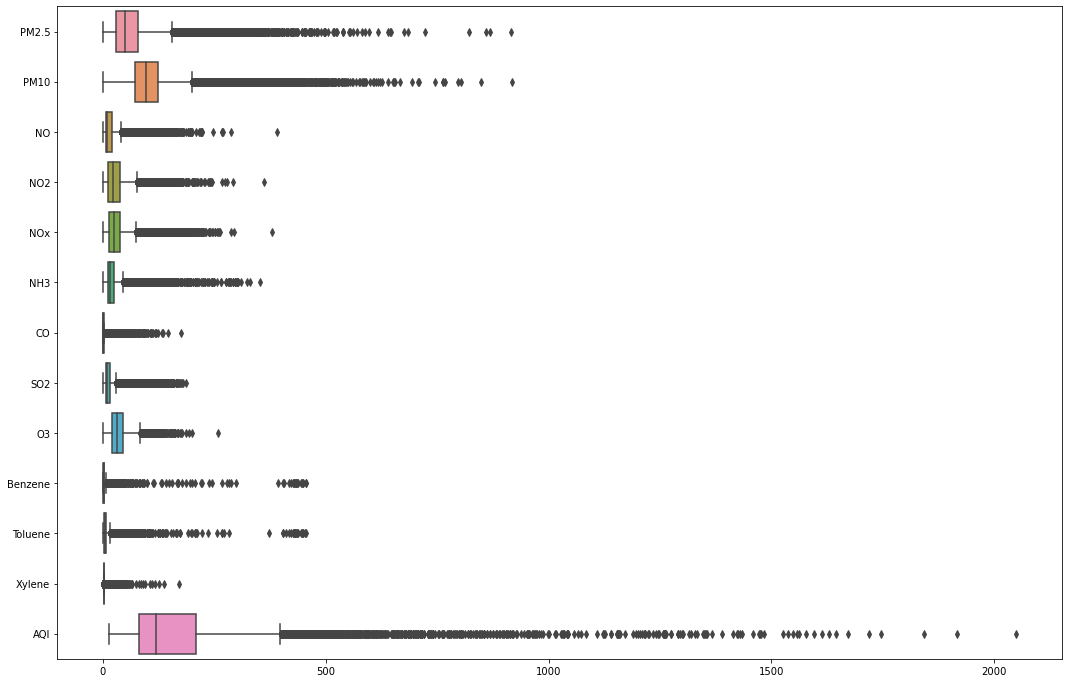

In [24]:
plt.figure(figsize=(18,12))
sns.boxplot(data=df1, orient='h');

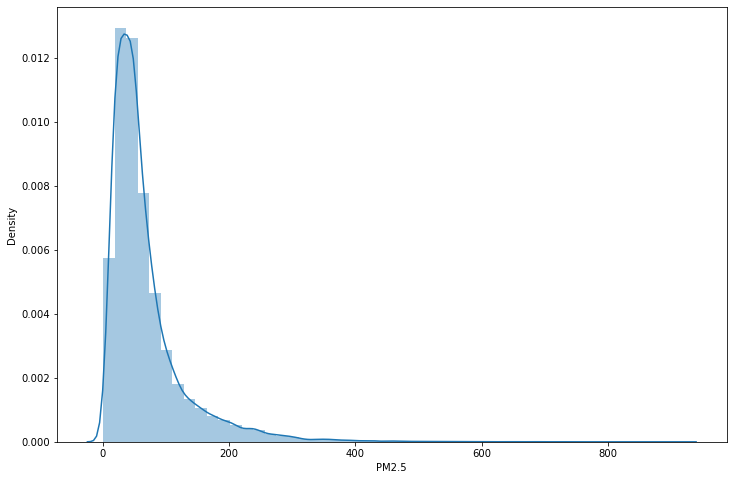

In [25]:
plt.figure(figsize=(12,8))
sns.distplot(df1['PM2.5']);

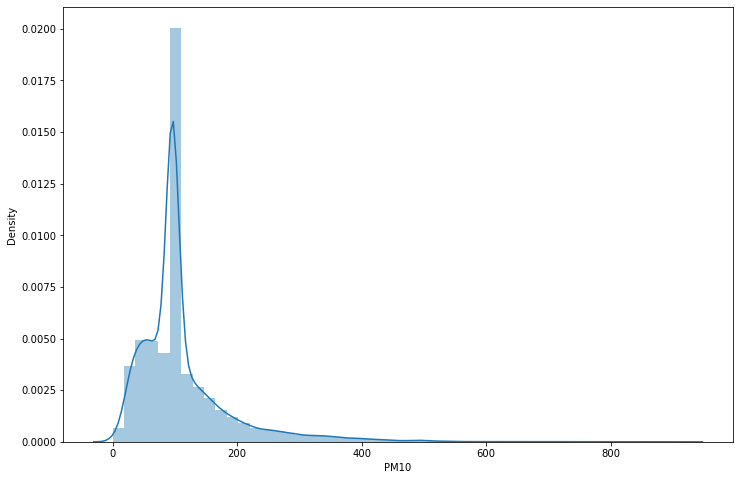

In [26]:
plt.figure(figsize=(12,8))
sns.distplot(df1['PM10']);

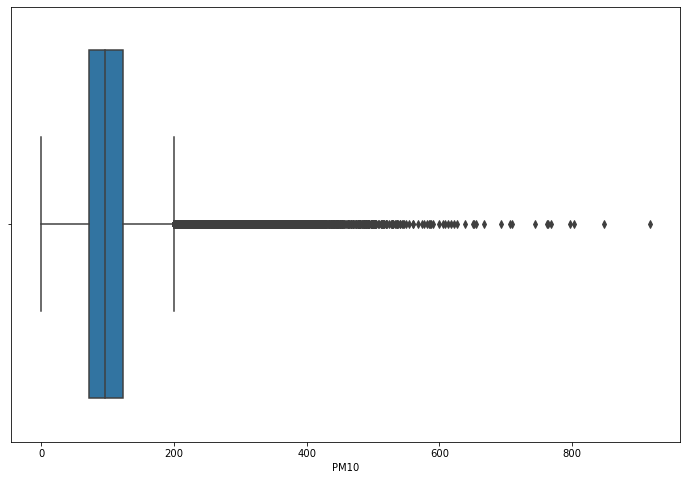

In [27]:
plt.figure(figsize=(12,8))
sns.boxplot(df1['PM10']);

In [28]:
def iqr(df):
    
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)

    iqr = q3 - q1

    lower_bound = round(q1 - (1.5 * iqr), 2)
    upper_bound = round(q3 + (1.5 * iqr), 2)
    res = lower_bound, upper_bound
    
    return res

In [29]:
iqr(df1['PM10'])

(-4.99, 199.72)

In [30]:
iqr(df1['PM2.5'])

(-45.36, 154.43)

In [31]:
df2 = df1.drop(['City','Date','Air_quality'], axis=1)

In [32]:
df2.head(10)

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,37.63,96.18,4.42,35.04,20.17,16.31,0.28,14.40,9.69,1.73,47.050,1.87,119.0
1,4.49,5.39,11.44,0.07,15.11,19.41,0.02,2.07,3.39,1.29,3.575,1.42,20.0
2,22.00,34.00,1.50,9.68,6.40,8.45,0.59,10.88,29.15,0.10,0.500,1.42,54.0
3,57.67,100.99,32.81,15.11,30.20,17.73,0.59,3.48,16.48,1.30,1.100,8.82,78.0
4,17.50,30.48,3.95,13.25,14.83,7.42,0.54,6.66,15.40,0.27,0.650,1.42,43.0
5,14.00,30.00,1.10,5.12,3.62,8.05,0.35,12.45,48.77,1.29,3.575,1.42,69.0
6,32.90,72.38,0.56,9.87,5.92,36.63,0.33,14.91,34.33,3.31,0.330,0.46,66.0
7,15.95,4.85,6.22,10.72,16.44,33.52,1.02,9.23,48.37,0.09,0.000,1.42,92.0
8,54.01,128.66,6.33,21.05,16.81,29.06,0.97,11.15,29.73,2.03,23.570,0.65,101.0
9,5.88,13.91,2.58,2.40,1.60,1.44,2.10,2.72,31.25,0.00,0.000,0.00,111.0


In [33]:
for i in df2.columns:
    print(i, iqr(df2[i]))

PM2.5 (-45.36, 154.43)
PM10 (-4.99, 199.72)
NO (-15.27, 40.7)
NO2 (-26.64, 76.64)
NOx (-22.18, 74.38)
NH3 (-8.87, 44.86)
CO (-0.72, 2.76)
SO2 (-7.86, 28.54)
O3 (-19.0, 84.03)
Benzene (-3.43, 6.62)
Toluene (-7.12, 16.08)
Xylene (1.42, 1.42)
AQI (-109.5, 398.5)


In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24850 entries, 0 to 24849
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PM2.5    24850 non-null  float64
 1   PM10     24850 non-null  float64
 2   NO       24850 non-null  float64
 3   NO2      24850 non-null  float64
 4   NOx      24850 non-null  float64
 5   NH3      24850 non-null  float64
 6   CO       24850 non-null  float64
 7   SO2      24850 non-null  float64
 8   O3       24850 non-null  float64
 9   Benzene  24850 non-null  float64
 10  Toluene  24850 non-null  float64
 11  Xylene   24850 non-null  float64
 12  AQI      24850 non-null  float64
dtypes: float64(13)
memory usage: 2.5 MB


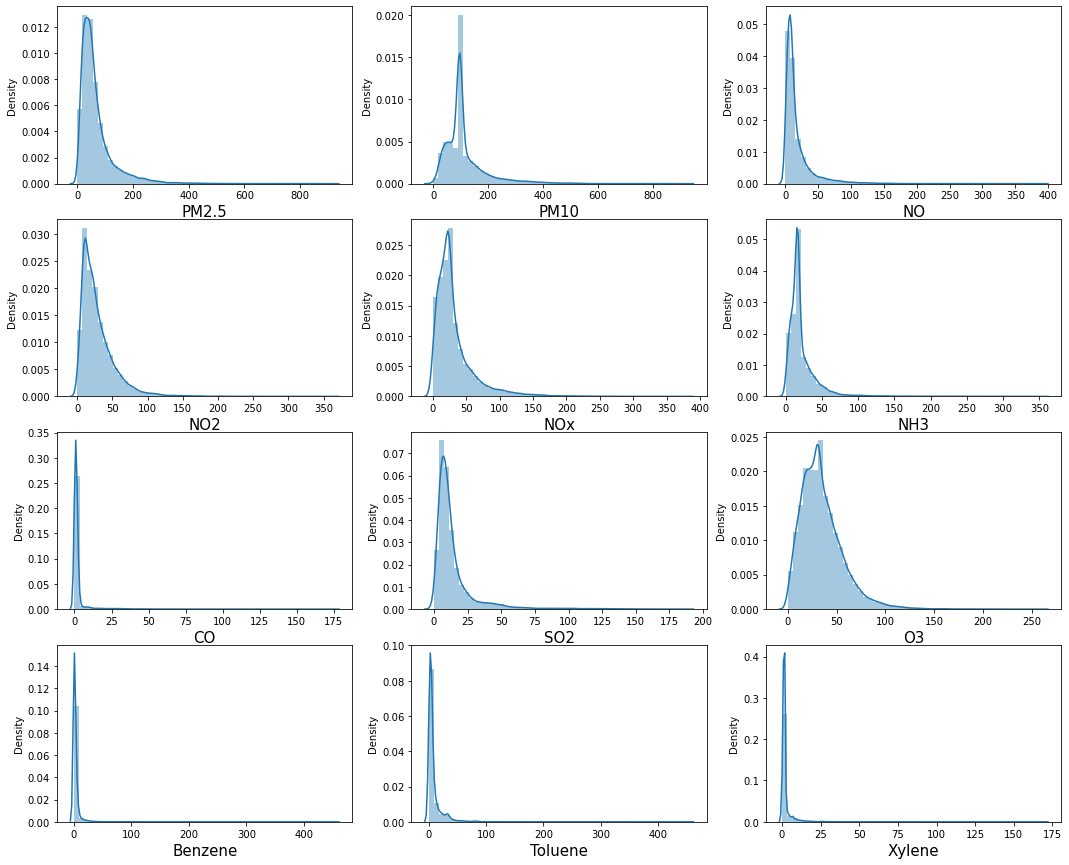

In [35]:
# plot the boxplot for each variable
# subplots(): plot subplots
# figsize(): set the figure size
fig, ax = plt.subplots(4, 3, figsize=(18, 15))

# z: let the variable z define the boxplot
# x: data for which the boxplot is to be plotted
# ax: specifies the axes object to draw the plot o

for variable, subplot in zip(df2.columns, ax.flatten()):
    z = sns.distplot(x = df2[variable], ax=subplot) # plot the distplot
    z.set_xlabel(variable, fontsize = 15)

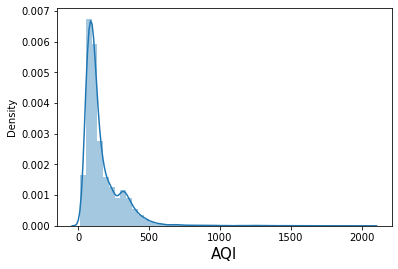

In [36]:
fig = sns.distplot(x = df2['AQI'])
fig.set_xlabel('AQI', fontsize = 15);